### Import Dataframe

In [450]:
from transform import transform_main
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy_financial as npf
import numpy as np

forecasted_collections = transform_main()['forecasted_collections']
sale_data = transform_main()['sale_data']

### Total Value of Debt

In [451]:
sale_data['Balance for Sale'].sum().round(2).item()

4694924.98

### Total Debt Paid off

In [452]:
periods = ['Jun-23', 'Jul-23', 'Aug-23', 'Sep-23',
                   'Oct-23', 'Nov-23', 'Dec-23', 'Jan-24',
                   'Feb-24', 'Mar-24', 'Apr-24', 'May-24',
                   'Jun-24']

collected_debt = sale_data[periods].sum().sum().round(2)
collected_debt.item()

661067.2

### Monthy Trend

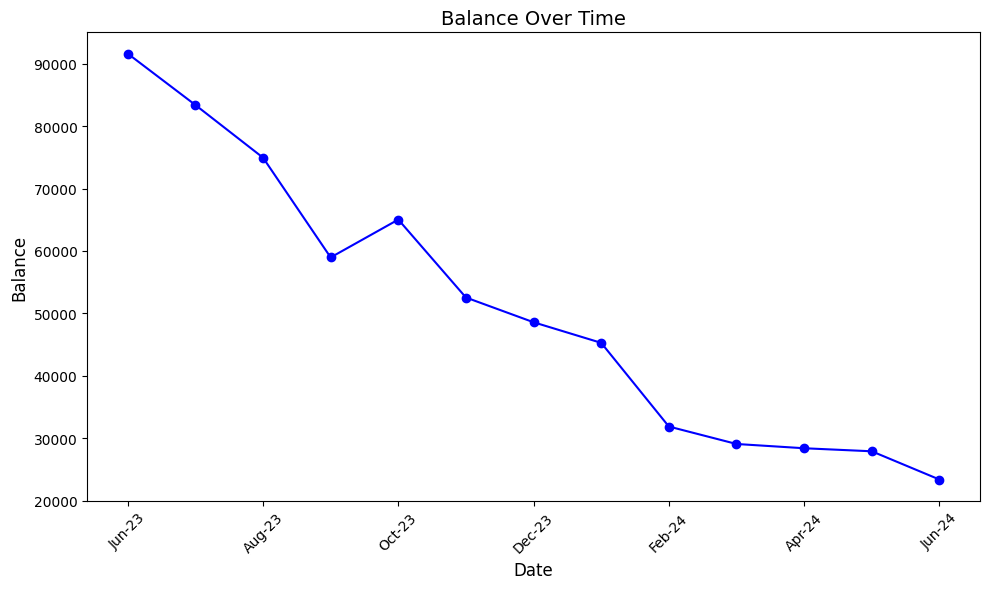

In [453]:
monthly_sum = sale_data[periods].sum().round(2)


plt.figure(figsize=(10, 6))
monthly_sum.plot(marker='o', linestyle='-', color='b')

# Setting the labels and title
plt.title('Balance Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Balance', fontsize=12)

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

### Nominal monthly missed payments


In [454]:
total_missed_payments = (sale_data[periods] == 0.0).sum()
total_missed_payments

Jun-23    104
Jul-23     90
Aug-23     80
Sep-23    152
Oct-23     82
Nov-23     88
Dec-23     95
Jan-24     58
Feb-24    127
Mar-24    141
Apr-24    126
May-24    197
Jun-24    338
dtype: int64

### Percentage monthly missed payments

In [455]:
total_rows = sale_data.shape[0]

((total_missed_payments/total_rows) * 100).round(3)

Jun-23    10.982
Jul-23     9.504
Aug-23     8.448
Sep-23    16.051
Oct-23     8.659
Nov-23     9.293
Dec-23    10.032
Jan-24     6.125
Feb-24    13.411
Mar-24    14.889
Apr-24    13.305
May-24    20.803
Jun-24    35.692
dtype: float64

### Total Missed Payments

In [456]:
total_missed_payments.sum().item()

1678

### Percentage Missed Payments


In [457]:
total_payment_count = sale_data[periods].count().sum()

((total_missed_payments.sum()/total_payment_count) * 100).round(3).item()

13.63

### Number of High Risk Payers

In [458]:
zero_count_per_row = (sale_data == 0).sum(axis=1)
sale_data['missed_payments'] = zero_count_per_row


### Debt Amounts

In [459]:
debt_range = [0, 1000, 5000, 10000, float('inf')]
debt_labels = ['£0 - £1,000',
          '£1,001 - £5,000', '£5,001 - £10,000', '£10,001 and above']

copy_sale_data = sale_data.copy()

copy_sale_data['debt_ranges'] = pd.cut(
    copy_sale_data['Balance for Sale'], bins=debt_range, labels=debt_labels, right=True)

grouped_debt = copy_sale_data.groupby('debt_ranges', observed=True)[
    'Balance for Sale'].count()

grouped_debt

debt_ranges
£0 - £1,000           32
£1,001 - £5,000      558
£5,001 - £10,000     221
£10,001 and above    136
Name: Balance for Sale, dtype: int64

### Age Split

In [460]:
age_range = [0, 18, 35, 50, 65, 80, float('inf')]
age_labels = ['0-17', '18-34', '35-49', '50-64', '65-79', '80 and above']

copy_sale_data['Age Group'] = pd.cut(copy_sale_data['Age'], bins=age_range,
                         labels=age_labels, right=True)

grouped_ages = copy_sale_data.groupby('Age Group', observed=True)['Age'].count()

grouped_ages

Age Group
18-34             7
35-49           270
50-64           413
65-79           199
80 and above     49
Name: Age, dtype: int64

### Title Split

In [461]:
valid_titles = ['Mr', 'Miss', 'Mrs', 'Ms', 'Dr']

title_df = sale_data[sale_data['Title'].isin(valid_titles)]

title_counts = title_df['Title'].value_counts()

title_counts

Title
Mr      493
Mrs     279
Miss    149
Ms       23
Dr        3
Name: count, dtype: int64

### Homeownership Rate

In [462]:
owners = sale_data[sale_data['Homeowner Y/N'] == 'Yes'].shape[0]
not_owners = sale_data[sale_data['Homeowner Y/N'] == 'No'].shape[0]

round((owners/(owners + not_owners) * 100), 2)

46.99

# **Number of Consistent Borrowers**

In [463]:
consistent_borrowers_df = sale_data[sale_data['missed_payments'] == 0]
consistent_borrowers_df

,Unique Reference Number,Title,DoB,Homeowner Y/N,Balance for Sale,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23,Nov-23,Dec-23,Jan-24,Feb-24,Mar-24,Apr-24,May-24,Jun-24,Age,missed_payments
0,16832187,Mr,1983-07-02 00:00:00,No,1134.378,105.000,58.000,75.000,72.000,69.000,60.00,54.000,48.000,39.000,36.000,33.000,36.000,39.000,41,0
3,16832198,Mr,1947-02-21 00:00:00,Yes,12232.737,140.000,116.000,100.000,96.000,92.000,80.00,72.000,64.000,52.000,48.000,44.000,48.000,52.000,77,0
9,16832230,Miss,1981-07-31 00:00:00,Yes,1687.572,70.000,58.000,50.000,48.000,46.000,40.00,36.000,32.000,26.000,24.000,22.000,24.000,26.000,43,0
10,16832235,Mr,1962-04-29 00:00:00,No,7240.266,35.000,29.000,25.000,24.000,23.000,20.00,18.000,16.000,13.000,12.000,11.000,12.000,13.000,62,0
13,16832253,Mr,1986-04-03 00:00:00,No,1212.462,3.500,2.900,2.500,2.400,2.300,2.00,1.800,1.600,1.300,1.200,1.100,1.200,1.300,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,16837252,Mr,1967-07-16 00:00:00,Yes,1494.765,3.500,2.900,2.500,2.400,2.300,2.00,1.800,1.600,1.300,1.200,1.100,1.200,1.300,57,0
936,16837282,Mr,1938-10-17 00:00:00,No,2307.240,38.955,32.277,27.825,26.712,25.599,22.26,19.116,17.808,13.533,12.924,12.243,12.492,14.469,85,0
938,16837286,Mr,1943-11-06 00:00:00,No,918.054,3.500,2.900,2.500,2.400,2.300,2.00,1.800,1.600,1.300,1.200,1.100,1.200,1.300,80,0
939,16837288,Ms,1938-10-02 00:00:00,No,9171.927,45.500,37.700,32.500,31.200,29.900,26.00,23.400,20.800,16.900,15.600,14.300,15.600,16.900,85,0


### Consistent Borrowers Debt Split

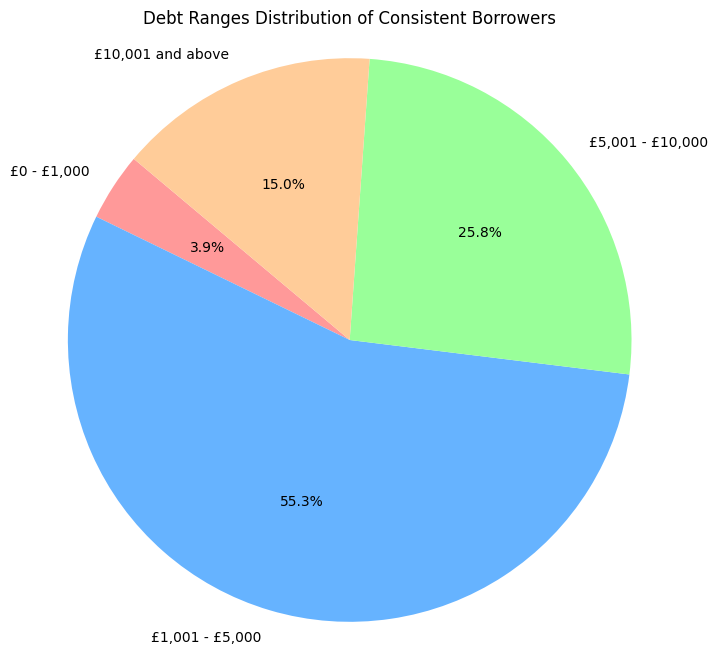

In [464]:
copy_consistent_borrowers_df = consistent_borrowers_df.copy()

copy_consistent_borrowers_df['debt_ranges'] = pd.cut(
    copy_consistent_borrowers_df['Balance for Sale'], bins=debt_range, labels=debt_labels, right=True)

grouped_debt_consistent = copy_consistent_borrowers_df.groupby('debt_ranges', observed=True)[
    'Balance for Sale'].count()

grouped_debt_consistent

plt.figure(figsize=(8, 8))
plt.pie(grouped_debt_consistent.values, labels=grouped_debt_consistent.index, autopct='%1.1f%%', startangle=140, 
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Debt Ranges Distribution of Consistent Borrowers')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

### Consistent Borrowers Age Split

In [465]:
copy_consistent_borrowers_df['Age Group'] = pd.cut(copy_consistent_borrowers_df['Age'], bins=age_range,
                                     labels=age_labels, right=True)

grouped_ages_consistent = copy_consistent_borrowers_df.groupby(
    'Age Group', observed=True)['Age'].count()

grouped_ages_consistent

Age Group
18-34             3
35-49            93
50-64           129
65-79            86
80 and above     16
Name: Age, dtype: int64

### Consistent Borrowers Title Split

In [466]:
consistent_title_df = consistent_borrowers_df[consistent_borrowers_df['Title'].isin(valid_titles)]

consistent_title_counts = consistent_title_df['Title'].value_counts()

consistent_title_counts

Title
Mr      180
Mrs     108
Miss     40
Ms        4
Dr        1
Name: count, dtype: int64

### Consistent Borrowers Homeownership Rate 

In [467]:
consistent_owners = consistent_borrowers_df[consistent_borrowers_df['Homeowner Y/N'] == 'Yes'].shape[0]
consistent_not_owners = consistent_borrowers_df[consistent_borrowers_df['Homeowner Y/N'] == 'No'].shape[0]

round((consistent_owners/(consistent_owners + consistent_not_owners) * 100), 2)

46.55

# **Number of Risky Borrowers**

In [468]:
HIGH_RISK_RATE = 0.25

risky_borrowers_df = sale_data[sale_data['missed_payments'] > (len(periods) * HIGH_RISK_RATE)]
risky_borrowers_df

,Unique Reference Number,Title,DoB,Homeowner Y/N,Balance for Sale,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23,Nov-23,Dec-23,Jan-24,Feb-24,Mar-24,Apr-24,May-24,Jun-24,Age,missed_payments
4,16832200,Miss,1964-10-24 00:00:00,Yes,5503.914,137.690,0.000,196.7,0.000,90.482,78.68,0.000,62.944,51.623,47.652,0.000,42.960,46.527,59,4
14,16832255,Ms,1960-02-01 00:00:00,Yes,12929.058,1050.000,870.000,750.0,0.000,690.000,1200.00,540.000,0.000,0.000,0.000,440.000,0.000,260.000,64,5
22,16832301,Miss,1970-02-11 00:00:00,Yes,7392.312,17.500,14.500,12.5,12.000,11.500,10.00,0.000,8.000,6.500,0.000,0.000,0.000,0.000,54,5
23,16832306,Mr,2046-09-28 00:00:00,Yes,12416.400,70.000,58.000,50.0,48.000,46.000,40.00,36.000,0.000,0.000,0.000,0.000,0.000,0.000,-22,6
24,16832308,Mr,2049-12-29 00:00:00,Yes,3798.567,123.620,102.428,0.0,169.536,0.000,141.28,63.576,56.512,0.000,42.384,38.852,0.000,86.723,-26,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,16837257,Miss,1989-05-15 00:00:00,No,959.094,70.000,58.000,50.0,48.000,46.000,0.00,27.000,32.000,0.000,0.000,0.000,0.000,0.000,35,6
935,16837258,Mr,1955-12-13 00:00:00,No,2078.766,0.000,0.000,5.0,4.800,0.000,4.00,0.000,0.000,0.000,2.400,0.000,2.400,2.600,68,7
937,16837284,Mr,1953-07-23 00:00:00,Yes,5745.519,17.500,0.000,25.0,0.000,11.500,20.00,9.000,8.000,1.300,0.000,0.000,0.000,0.000,71,6
940,16837299,Mr,1971-06-10 00:00:00,Yes,918.909,11.025,0.000,39.8,0.000,0.000,43.76,58.662,0.000,0.000,26.280,12.694,13.848,15.002,53,5


### Risky Borrowers Debt Split

In [469]:
copy_risky_borrowers_df = risky_borrowers_df.copy()

copy_risky_borrowers_df['debt_ranges'] = pd.cut(
    copy_risky_borrowers_df['Balance for Sale'], bins=debt_range, labels=debt_labels, right=True)

grouped_debt_risky = copy_risky_borrowers_df.groupby('debt_ranges', observed=True)[
    'Balance for Sale'].count()

grouped_debt_risky

debt_ranges
£0 - £1,000            6
£1,001 - £5,000      109
£5,001 - £10,000      32
£10,001 and above     25
Name: Balance for Sale, dtype: int64

### Risk Borrowers Age Split

In [470]:
copy_risky_borrowers_df['Age Group'] = pd.cut(copy_risky_borrowers_df['Age'], bins=age_range,
                                     labels=age_labels, right=True)

grouped_ages_risky = copy_risky_borrowers_df.groupby(
    'Age Group', observed=True)['Age'].count()

grouped_ages_risky

Age Group
18-34            1
35-49           59
50-64           74
65-79           25
80 and above    11
Name: Age, dtype: int64

### Risky Borrowers Title Split

In [471]:
risky_title_df = risky_borrowers_df[risky_borrowers_df['Title'].isin(valid_titles)]

risky_title_counts = risky_title_df['Title'].value_counts()

risky_title_counts

Title
Mr      81
Mrs     49
Miss    35
Ms       7
Name: count, dtype: int64

### Risky Borrowers Homeownership Rate

In [472]:
risky_owners = risky_borrowers_df[risky_borrowers_df['Homeowner Y/N'] == 'Yes'].shape[0]
risky_not_owners = risky_borrowers_df[risky_borrowers_df['Homeowner Y/N'] == 'No'].shape[0]

round((risky_owners/(risky_owners + risky_not_owners) * 100), 2)

51.74

# **Segmentation Plots**

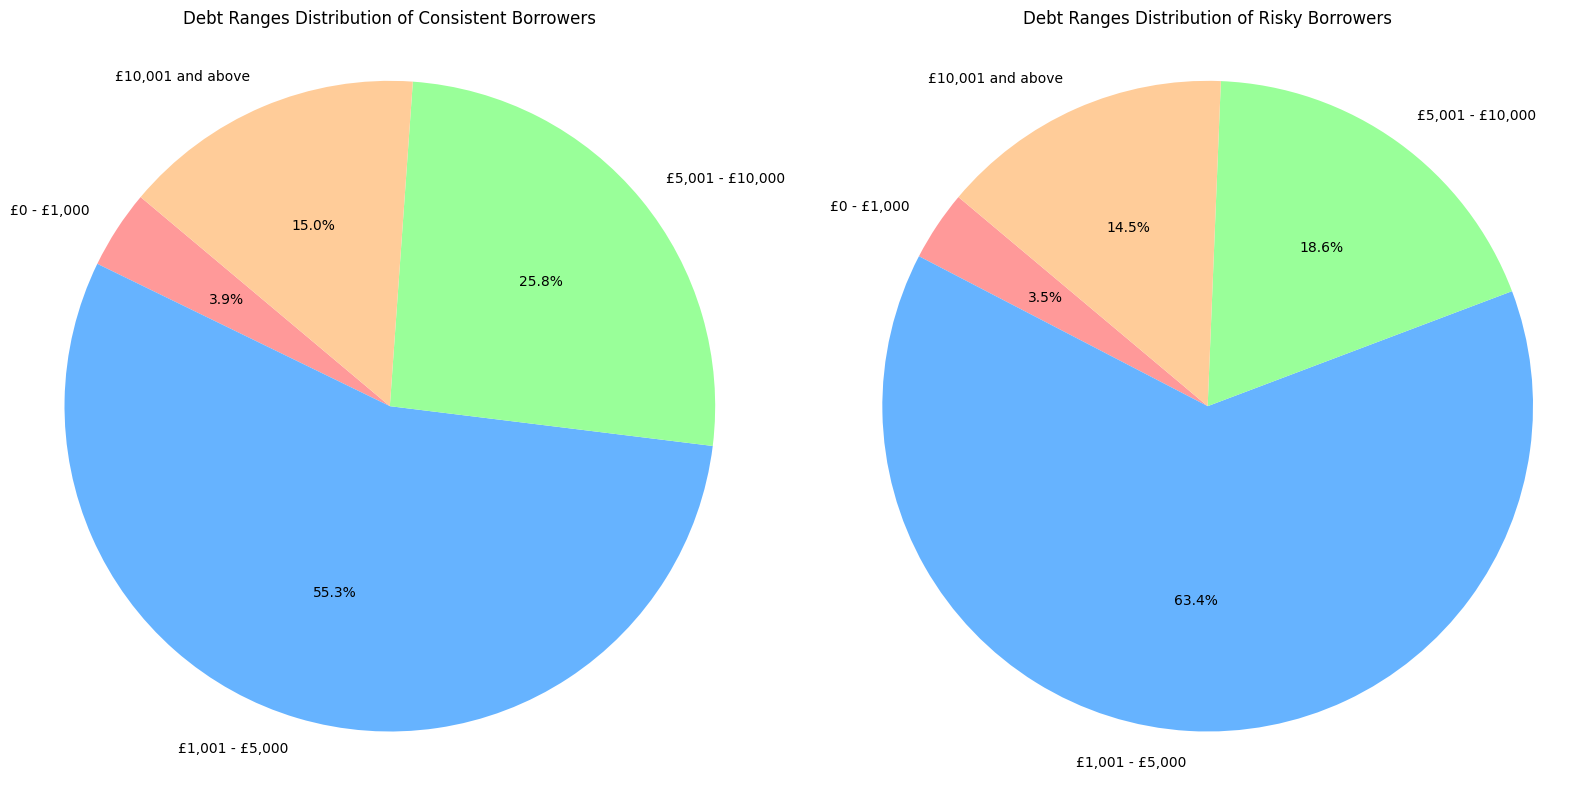

In [473]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].pie(grouped_debt_consistent.values, labels=grouped_debt_consistent.index, autopct='%1.1f%%', startangle=140,
           colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axs[0].set_title('Debt Ranges Distribution of Consistent Borrowers')
axs[0].axis('equal') 

axs[1].pie(grouped_debt_risky.values, labels=grouped_debt_risky.index, autopct='%1.1f%%', startangle=140,
           colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axs[1].set_title('Debt Ranges Distribution of Risky Borrowers')
axs[1].axis('equal')

plt.tight_layout()
plt.show()

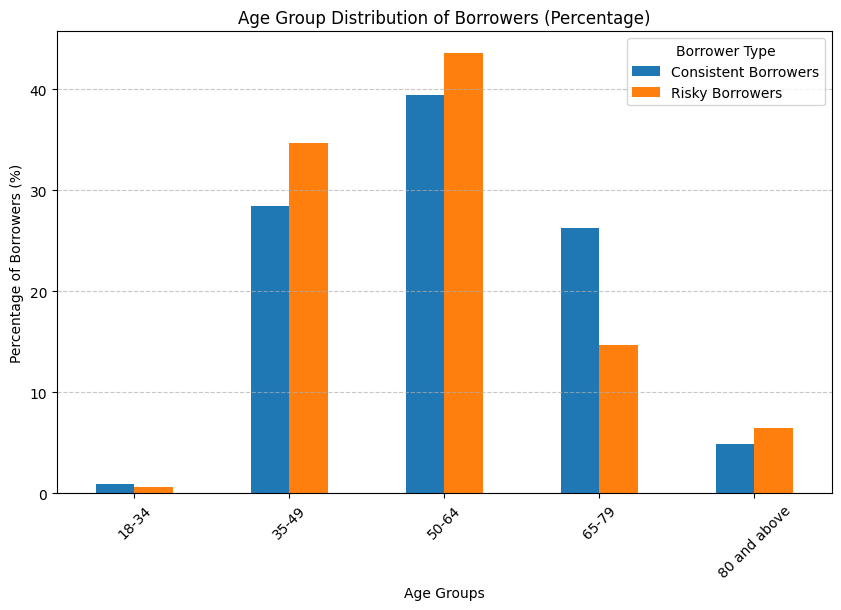

In [474]:
copy_consistent_borrowers_df['Age Group'] = pd.cut(copy_consistent_borrowers_df['Age'], bins=age_range,
                                     labels=age_labels, right=True)

grouped_ages_consistent = copy_consistent_borrowers_df.groupby(
    'Age Group', observed=True)['Age'].count()

copy_risky_borrowers_df['Age Group'] = pd.cut(copy_risky_borrowers_df['Age'], bins=age_range,
                                     labels=age_labels, right=True)

grouped_ages_risky = copy_risky_borrowers_df.groupby(
    'Age Group', observed=True)['Age'].count()

grouped_ages_risky


copy_risky_borrowers_df['Age Group'] = pd.cut(copy_risky_borrowers_df['Age'], bins=age_range, labels=age_labels, right=True)
grouped_ages_risky = copy_risky_borrowers_df.groupby('Age Group', observed=True)['Age'].count()

percentage_ages_consistent = (grouped_ages_consistent / grouped_ages_consistent.sum()) * 100
percentage_ages_risky = (grouped_ages_risky / grouped_ages_risky.sum()) * 100

combined_percentages = pd.DataFrame({
    'Consistent Borrowers': percentage_ages_consistent,
    'Risky Borrowers': percentage_ages_risky
}).fillna(0) 

combined_percentages.plot(kind='bar', figsize=(10, 6))
plt.title('Age Group Distribution of Borrowers (Percentage)')
plt.xlabel('Age Groups')
plt.ylabel('Percentage of Borrowers (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Borrower Type')
plt.show()

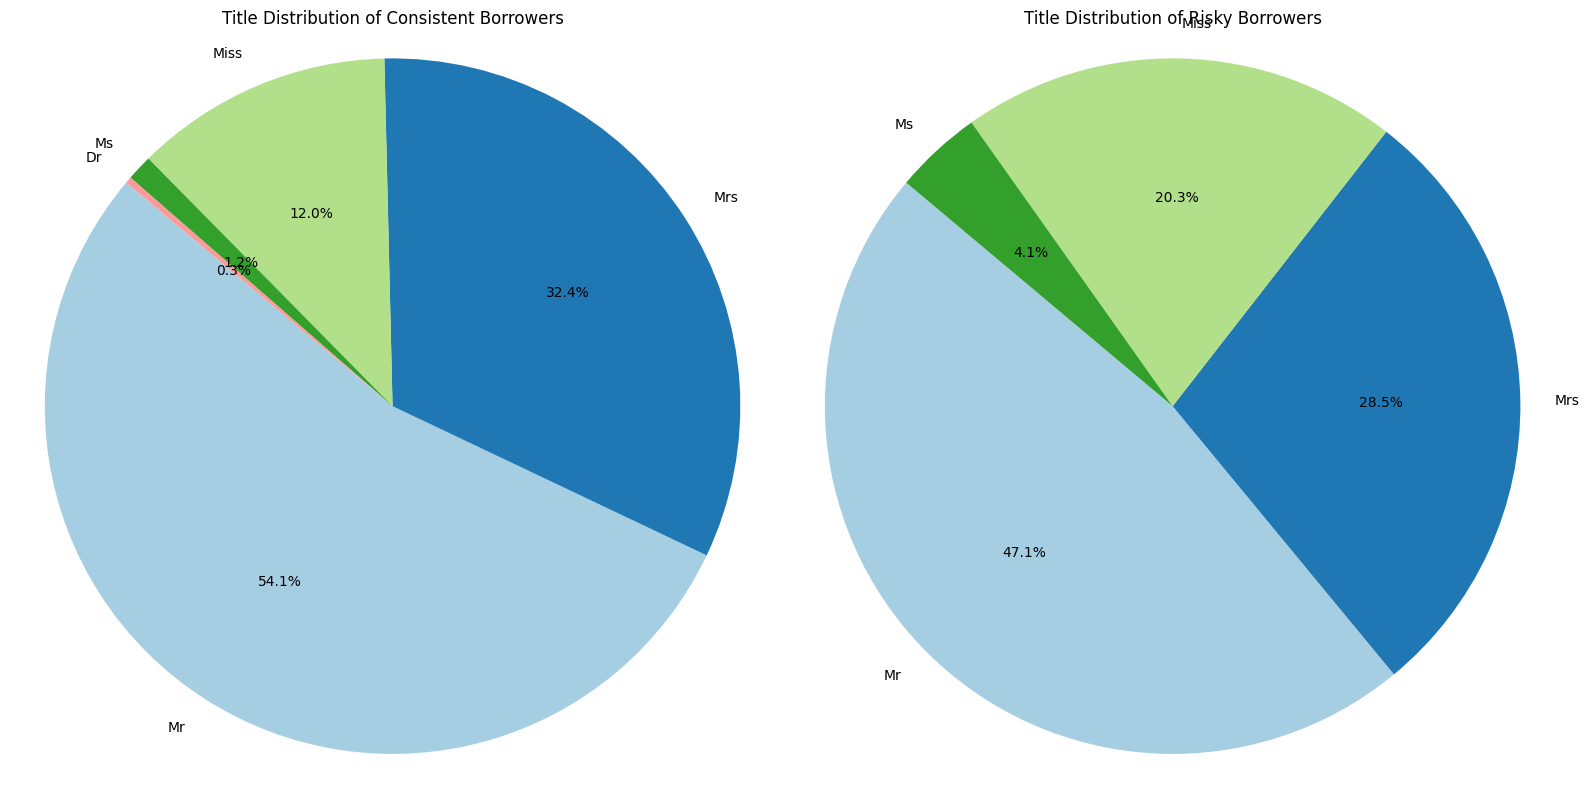

In [475]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].pie(consistent_title_counts.values, labels=consistent_title_counts.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors)
axs[0].set_title('Title Distribution of Consistent Borrowers')
axs[0].axis('equal')

axs[1].pie(risky_title_counts.values, labels=risky_title_counts.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors)
axs[1].set_title('Title Distribution of Risky Borrowers')
axs[1].axis('equal')
plt.tight_layout() 
plt.show()

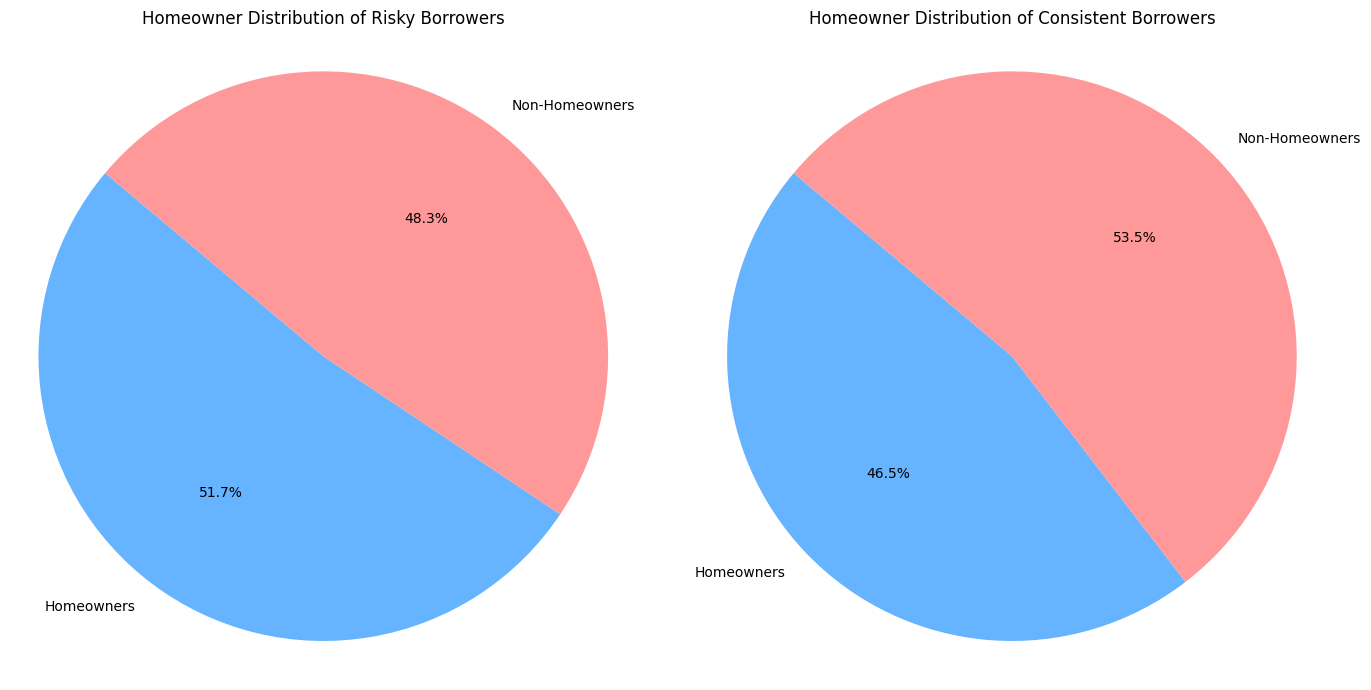

In [476]:
labels = ['Homeowners', 'Non-Homeowners']
risky_data = [risky_owners, risky_not_owners]
consistent_data = [consistent_owners, consistent_not_owners]

colors = ['#66b3ff', '#ff9999'] 

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].pie(risky_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
axs[0].set_title('Homeowner Distribution of Risky Borrowers')
axs[0].axis('equal')

axs[1].pie(consistent_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
axs[1].set_title('Homeowner Distribution of Consistent Borrowers')
axs[1].axis('equal') 
plt.tight_layout()  
plt.show()

# **Total Given Forecasted Future Income**

In [477]:
total_collections = forecasted_collections['Gross Collections'].sum()
round(total_collections, 2).item()

1606061.35

### Given Forecasted Future Monthly Income

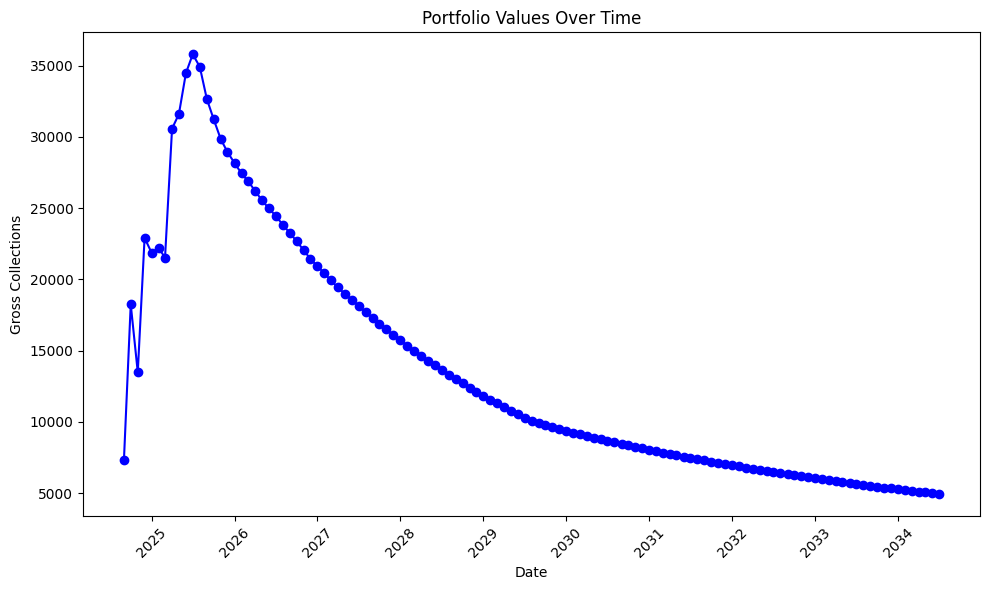

In [478]:
plot_collections_df = forecasted_collections.copy()
plot_collections_df['Date'] = pd.to_datetime(
    plot_collections_df['Date'], format='%b-%y')

plt.figure(figsize=(10, 6))
plt.plot(plot_collections_df['Date'], plot_collections_df['Gross Collections'],
         marker='o', linestyle='-', color='b')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Gross Collections')
plt.title('Portfolio Values Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### ARIMA Forecast

In [479]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Sample data (replace this with your actual monthly balance data)
data = {
    'Date': pd.date_range(start='2023-06-01', periods=13, freq='M'),
    'Balance': [105.000, 58.000, 75.000, 72.000, 69.000, 60.000, 54.000, 48.000, 39.000, 36.000, 33.000, 36.000, 39.000]
}

# Load data into DataFrame
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Check for stationarity
result = adfuller(df['Balance'])
if result[1] > 0.05:
    df['Balance'] = df['Balance'].diff().dropna()  # Difference the data if not stationary

# Fit ARIMA model (adjust (p, d, q) as necessary)
model = ARIMA(df['Balance'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 3 months
forecast = model_fit.forecast(steps=3)

# Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Balance'], label='Historical Data')
plt.plot(pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=3, freq='M'), forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


NameError: name 'data' is not defined

### Variability Of Payment Amounts

In [443]:
payments_df = sale_data[periods].copy()
payments_df['Total'] = payments_df.sum(axis=1)
payments_df['Average'] = payments_df['Total'] / len(periods)
payments_df['Standard Deviation'] = payments_df[periods].std(axis=1)

payments_df

,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23,Nov-23,Dec-23,Jan-24,Feb-24,Mar-24,Apr-24,May-24,Jun-24,Total,Average,Standard Deviation
0,105.000,58.000,75.000,72.000,69.000,60.00,54.000,48.000,39.000,36.000,33.000,36.000,39.000,724.000,55.692308,20.778132
1,35.000,29.000,25.000,24.000,23.000,20.00,18.000,16.000,13.000,12.000,11.000,12.000,0.000,238.000,18.307692,9.113951
2,65.835,54.549,47.025,45.144,0.000,56.44,16.920,0.000,24.453,11.280,0.000,11.280,12.220,345.146,26.549692,23.925520
3,140.000,116.000,100.000,96.000,92.000,80.00,72.000,64.000,52.000,48.000,44.000,48.000,52.000,1004.000,77.230769,30.039291
4,137.690,0.000,196.700,0.000,90.482,78.68,0.000,62.944,51.623,47.652,0.000,42.960,46.527,755.258,58.096769,58.492755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,17.500,0.000,0.000,12.000,11.500,10.00,9.000,8.000,6.500,6.000,5.500,6.000,6.500,98.500,7.576923,4.725137
945,0.000,25.230,0.000,45.792,21.942,0.00,17.172,0.000,12.402,0.000,10.538,11.496,12.454,157.026,12.078923,13.432558
946,1137.500,942.500,812.500,780.000,747.500,650.00,585.000,520.000,422.500,390.000,357.500,390.000,0.000,7735.000,595.000000,296.203407
947,3.500,3.625,3.125,3.000,2.875,2.50,0.000,2.000,3.198,1.452,1.331,0.000,1.573,28.179,2.167615,1.230584


### Coefficient of Variation

In [444]:
payments_df['Total'] = payments_df.sum(axis=1)
payments_df['Average'] = payments_df.mean(axis=1)

payments_df['Standard Deviation'] = payments_df.iloc[:,:-2].std(axis=1)

payments_df['Coefficient of Variation (%)'] = (
    payments_df['Standard Deviation'] / payments_df['Average']) * 100

overall_std = payments_df['Total'].std()
overall_avg = payments_df['Total'].mean()

overall_cv = ((overall_std / overall_avg) * 100).round(2)

overall_cv.item()

155.67

### Net Present Value

In [445]:
forecasted_collections_values = forecasted_collections['Gross Collections'].values
store_values = []

DISCOUNT_RATE = 0.15

def calculate_npv(time, value, discount_rate=DISCOUNT_RATE):
    return value / (1 + (discount_rate/12)) ** time

for index, value in enumerate(forecasted_collections_values, 1):
    store_values.append((index, value.item()))

total = 0
for values in store_values:
    total += calculate_npv(values[0], values[1])

print(total)

1023619.569310447


### Interest Rate of Return

In [446]:
initial_payment = -1000000

cash_flows = [initial_payment]
for values in store_values:
    cash_flows.append(values[1])

monthly_irr = npf.irr(cash_flows)

annual_irr = (1 + monthly_irr) ** 12 - 1

print(annual_irr)

0.17120643233501687


In [447]:
# target_npv = 1000000
# low_rate = 0.155
# high_rate = 0.2
# precision = 0.00000001
# closest_rate = low_rate

# best_difference = float('inf')

# while low_rate <= high_rate:

#     npv = 0
#     for values in store_values:
#         npv += calculate_npv(values[0], values[1], low_rate)

#     current_difference = abs(npv - target_npv)
#     if current_difference <= 0.1:
#         print(f'low rate: {low_rate}')
#         print('hit')
#         break

#     if npv > target_npv:
#         npv = 0
#         low_rate += precision
#     elif npv < target_npv:
#         npv = 0
#         high_rate -= precision